# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the datasets

In [2]:
train_data = pd.read_csv('train_data.csv',sep=',',header=0)
test_data = pd.read_csv('test_data-1585196922695.csv',sep=',',header=0)
product_prices = pd.read_csv('product_prices-1585196839158.csv',sep=',',header=0)
date_to_week_id_map = pd.read_csv('date_to_week_id_map-1585196862691.csv',sep=',',header=0)

# Displaying the dimensions of the datasets

In [3]:
print('shape of train_data',train_data.shape)
print('shape of test_data',test_data.shape)
print('shape of product_prices',product_prices.shape)
print('shape of date_to_week_id_map',date_to_week_id_map.shape)

shape of train_data (395000, 7)
shape of test_data (15500, 7)
shape of product_prices (59000, 4)
shape of date_to_week_id_map (821, 2)


# Displaying head of the datasets

In [4]:
train_data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [5]:
test_data.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [6]:
product_prices.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [7]:
date_to_week_id_map.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


# Merging the datasets 

In [3]:
def merge_df(df) :
    df = pd.merge(left=df,right=date_to_week_id_map,on="date",how="left")
    df=pd.merge(left=df,right=product_prices,on=["outlet",'product_identifier','week_id'])
    
    return df

In [4]:
train_data = merge_df(train_data)
test_data = merge_df(test_data)

In [10]:
print('shape of train_data',train_data.shape)     # dimensions of train and test datasets after the merge
print('shape of test_data',test_data.shape)

shape of train_data (395000, 9)
shape of test_data (15500, 9)


In [11]:
train_data.head(1)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94


In [12]:
test_data.head(1)

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43


In [13]:
train_data.dtypes    # Checking the data types

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [14]:
train_data.describe().T    # summary of the dataset

,count,mean,std,min,25%,50%,75%,max
product_identifier,395000.0,1509.960000,809.799518,74.00,926.00,1325.00,1753.00,3021.00
department_identifier,395000.0,24.460000,6.337863,11.00,21.00,22.00,31.00,33.00
outlet,395000.0,211.200000,91.161291,111.00,113.00,221.50,331.00,333.00
sales,395000.0,1.228919,3.595266,0.00,0.00,0.00,1.00,293.00
week_id,395000.0,105.070886,32.578749,49.00,77.00,105.00,133.00,161.00
sell_price,395000.0,4.987644,3.874444,0.05,2.68,3.98,6.48,44.36


In [15]:
train_data.describe(include="object")

,date,category_of_product,state
count,395000,395000,395000
unique,790,3,3
top,2013-06-02,fast_moving_consumer_goods,Maharashtra
freq,500,229100,158000


#### The top selling category of product is fast_moving_consumer_goods
#### The state with the maximum sales is Maharashtra

In [16]:
train_data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-02,74,11,others,111,Maharashtra,0,49,2.94
2,2012-01-03,74,11,others,111,Maharashtra,1,49,2.94
3,2012-01-04,74,11,others,111,Maharashtra,0,49,2.94
4,2012-01-05,74,11,others,111,Maharashtra,0,49,2.94


In [17]:
for col in ["category_of_product",'state'] :
    train_data[col] = train_data[col].astype("category")       # Converting to categorical data types

In [18]:
train_data.dtypes

date                       object
product_identifier          int64
department_identifier       int64
category_of_product      category
outlet                      int64
state                    category
sales                       int64
week_id                     int64
sell_price                float64
dtype: object

# Checking the unique levels 

In [19]:
len(train_data["product_identifier"].value_counts())

50

In [20]:
train_data["department_identifier"].value_counts()

22    134300
33     94800
21     94800
31     39500
12     15800
11     15800
Name: department_identifier, dtype: int64

In [21]:
train_data["category_of_product"].value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

In [22]:
train_data["outlet"].value_counts()

223    39500
222    39500
221    39500
114    39500
113    39500
112    39500
111    39500
333    39500
332    39500
331    39500
Name: outlet, dtype: int64

In [23]:
train_data["state"].value_counts()

Maharashtra    158000
Telangana      118500
Kerala         118500
Name: state, dtype: int64

# checking for missing values

In [24]:
train_data.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [25]:
test_data.isnull().sum()

id                       0
date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
week_id                  0
sell_price               0
dtype: int64

# Selecting categorical and numerical attributes

In [26]:
catt_attr = list(train_data.select_dtypes(include=["category"]).columns)
catt_attr

['category_of_product', 'state']

In [27]:
num_attr = list(train_data.select_dtypes(include=["int64",'float64']).columns)
num_attr

['product_identifier',
 'department_identifier',
 'outlet',
 'sales',
 'week_id',
 'sell_price']

# Creating dummy variables

In [28]:
train_data = pd.get_dummies(train_data,columns=catt_attr,drop_first=True)

In [29]:
train_data.head()

,date,product_identifier,department_identifier,outlet,sales,week_id,sell_price,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,state_Telangana
0,2012-01-01,74,11,111,0,49,2.94,0,1,1,0
1,2012-01-02,74,11,111,0,49,2.94,0,1,1,0
2,2012-01-03,74,11,111,1,49,2.94,0,1,1,0
3,2012-01-04,74,11,111,0,49,2.94,0,1,1,0
4,2012-01-05,74,11,111,0,49,2.94,0,1,1,0


In [30]:
train_data.shape

(395000, 11)

In [31]:
# Converting date column to datetime format

train_data['date'] = pd.to_datetime(train_data['date'])

In [32]:
train_data.dtypes

date                                              datetime64[ns]
product_identifier                                         int64
department_identifier                                      int64
outlet                                                     int64
sales                                                      int64
week_id                                                    int64
sell_price                                               float64
category_of_product_fast_moving_consumer_goods             uint8
category_of_product_others                                 uint8
state_Maharashtra                                          uint8
state_Telangana                                            uint8
dtype: object

# feature extraction

In [33]:
def derive_fearure(pdf) :
    pdf['year'] = pd.DatetimeIndex(pdf['date']).year
    pdf['month'] = pd.DatetimeIndex(pdf['date']).month
    pdf['quarter'] = pd.DatetimeIndex(pdf['date']).quarter
    pdf['day'] = pd.DatetimeIndex(pdf['date']).day
    pdf['day of the week'] = pd.DatetimeIndex(pdf['date']).dayofweek
    pdf['weekofyear'] = pd.DatetimeIndex(pdf['date']).weekofyear
    pdf['is_month_end'] = pd.DatetimeIndex(pdf['date']).is_month_end.astype(int)
    pdf['is_month_start'] = pd.DatetimeIndex(pdf['date']).is_month_start.astype(int)

    pdf['is_quarter_end'] = pd.DatetimeIndex(pdf['date']).is_quarter_end.astype(int)
    pdf['is_quarter_start'] = pd.DatetimeIndex(pdf['date']).is_quarter_start.astype(int)
    
    pdf['is_year_end'] = pd.DatetimeIndex(pdf['date']).is_year_end.astype(int)
    pdf['is_year_start'] = pd.DatetimeIndex(pdf['date']).is_year_start.astype(int)
    
    return pdf

In [34]:
train_data = derive_fearure(train_data)

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [35]:
train_data.head()

,date,product_identifier,department_identifier,outlet,sales,week_id,sell_price,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Maharashtra,...,quarter,day,day of the week,weekofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start
0,2012-01-01,74,11,111,0,49,2.94,0,1,1,...,1,1,6,52,0,1,0,1,0,1
1,2012-01-02,74,11,111,0,49,2.94,0,1,1,...,1,2,0,1,0,0,0,0,0,0
2,2012-01-03,74,11,111,1,49,2.94,0,1,1,...,1,3,1,1,0,0,0,0,0,0
3,2012-01-04,74,11,111,0,49,2.94,0,1,1,...,1,4,2,1,0,0,0,0,0,0
4,2012-01-05,74,11,111,0,49,2.94,0,1,1,...,1,5,3,1,0,0,0,0,0,0


In [36]:
train_data.shape

(395000, 23)

In [37]:
train_data.columns

Index(['date', 'product_identifier', 'department_identifier', 'outlet',
       'sales', 'week_id', 'sell_price',
       'category_of_product_fast_moving_consumer_goods',
       'category_of_product_others', 'state_Maharashtra', 'state_Telangana',
       'year', 'month', 'quarter', 'day', 'day of the week', 'weekofyear',
       'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start',
       'is_year_end', 'is_year_start'],
      dtype='object')

# Train - Test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = train_data.drop(["date","sales"],axis=1)
y = train_data['sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (276500, 21)
shape of y_train (276500,)
shape of X_test (118500, 21)
shape of y_test (118500,)


# Standardize the data (numerical attributes only)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
num_attr

['product_identifier',
 'department_identifier',
 'outlet',
 'sales',
 'week_id',
 'sell_price']

In [45]:
numerical_attributes = ['product_identifier',
 'department_identifier',
 'outlet',
 'week_id',
 'sell_price']

In [46]:
scaler.fit(X_train[numerical_attributes])

StandardScaler()

In [47]:
X_train[numerical_attributes] = scaler.transform(X_train[numerical_attributes])
X_test[numerical_attributes] = scaler.transform(X_test[numerical_attributes])

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

# Model building -  LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [52]:
train_prediction = lin_reg.predict(X_train)
test_prediction = lin_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
train_rmse = np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,test_prediction))

In [55]:
print("train_rmse :",round(train_rmse,2))
print("test_rmse :",round(test_rmse,2))

train_rmse : 3.45
test_rmse : 3.49


# Model building -  DECISION TREE

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
DT = DecisionTreeRegressor()

In [130]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [131]:
train_prediction_dt = DT.predict(X_train)
test_prediction_dt = DT.predict(X_test)

In [132]:
train_rmse_dt = np.sqrt(mean_squared_error(y_train,train_prediction_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test,test_prediction_dt))

In [134]:
print("train_rmse_dt :",round(train_rmse_dt,2))
print("test_rmse_dt :",round(test_rmse_dt,2))

train_rmse_dt : 2.23
test_rmse_dt : 2.83


In [52]:
# DECISION TREE WITH HYPER-PARAMETERS TUNNING

from sklearn.model_selection import GridSearchCV

dt_param_grid = {'criterion': ['mse'],
                 'max_depth': [6,8,10,12], 
                 "min_samples_split": [2, 10, 20],
                 "min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(DT, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [53]:
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [54]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [55]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

In [58]:
train_rmse_dtHP = np.sqrt(mean_squared_error(y_train,train_pred))
test_rmse_dtHP = np.sqrt(mean_squared_error(y_test,test_pred))

In [59]:
print("train_rmse_dtHP :",round(train_rmse_dtHP,2))
print("test_rmse_dtHP :",round(test_rmse_dtHP,2))

train_rmse_dtHP : 2.52
test_rmse_dtHP : 2.78


# Model building - RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [64]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22)

In [65]:
train_prediction_rf = RF.predict(X_train)
test_prediction_rf = RF.predict(X_test)

In [66]:
train_rmse_rf = np.sqrt(mean_squared_error(y_train,train_prediction_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test,test_prediction_rf))

In [67]:
print("train_rmse_rf :",round(train_rmse_rf,2))
print("test_rmse_rf :",round(test_rmse_rf,2))

train_rmse_rf : 2.9
test_rmse_rf : 3.03


In [68]:
RF.feature_importances_

array([6.55585839e-02, 3.11634469e-02, 1.48952900e-01, 1.83882647e-02,
       6.10868426e-01, 0.00000000e+00, 3.51148938e-02, 9.52529547e-06,
       2.94392992e-02, 0.00000000e+00, 1.70935466e-03, 4.83479505e-05,
       4.80468800e-02, 6.82010554e-03, 2.46075439e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.41921705e-03,
       0.00000000e+00])

In [69]:
coef = pd.Series(RF.feature_importances_, X_train.columns).sort_values(ascending=False)
coef

sell_price                                        0.610868
outlet                                            0.148953
product_identifier                                0.065559
day                                               0.048047
category_of_product_others                        0.035115
department_identifier                             0.031163
state_Telangana                                   0.029439
week_id                                           0.018388
day of the week                                   0.006820
weekofyear                                        0.002461
month                                             0.001709
is_year_end                                       0.001419
quarter                                           0.000048
state_Maharashtra                                 0.000010
year                                              0.000000
category_of_product_fast_moving_consumer_goods    0.000000
is_month_end                                      0.0000

C:\Users\Akshay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

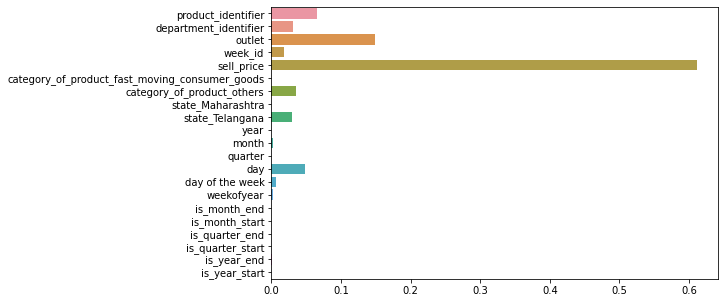

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

# Model building - XG BOOST

In [76]:
import xgboost

In [77]:
from xgboost import XGBRegressor

In [78]:
model = XGBRegressor()

In [79]:
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [80]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
train_xg = model.predict(X_train)
test_xg = model.predict(X_test)

In [82]:
train_rmse_xg = np.sqrt(mean_squared_error(y_train,train_xg))
test_rmse_xg = np.sqrt(mean_squared_error(y_test,test_xg))

In [83]:
print("train_rmse_xg :",train_rmse_xg)
print("test_rmse_xg :",test_rmse_xg)

train_rmse_xg : 2.49522962308921
test_rmse_xg : 2.67537033398296


# VISUALIZATIONS 

In [82]:
train_data.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-02,74,11,others,111,Maharashtra,0,49,2.94
2,2012-01-03,74,11,others,111,Maharashtra,1,49,2.94
3,2012-01-04,74,11,others,111,Maharashtra,0,49,2.94
4,2012-01-05,74,11,others,111,Maharashtra,0,49,2.94


In [14]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [90]:
train_data.dtypes

date                     datetime64[ns]
product_identifier                int64
department_identifier             int64
category_of_product              object
outlet                            int64
state                            object
sales                             int64
week_id                           int64
sell_price                      float64
dtype: object

In [17]:
train_data.set_index('date',inplace=True)

## Monthly sales

<AxesSubplot:xlabel='date'>

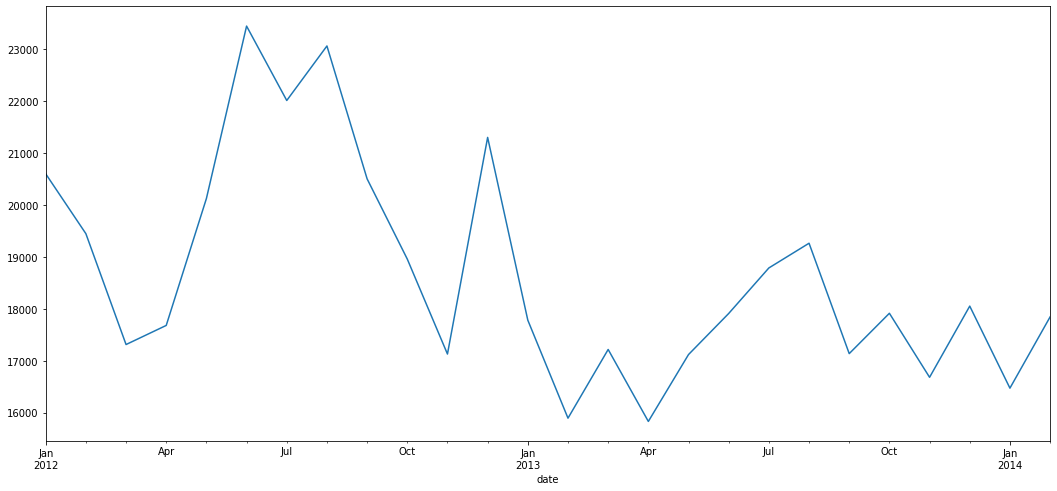

In [96]:
a=train_data['sales'].resample('M').sum()
a.plot.line(figsize=(18,8))

## Yearly sales

Text(0.5, 1.0, 'YEARLY SALES')

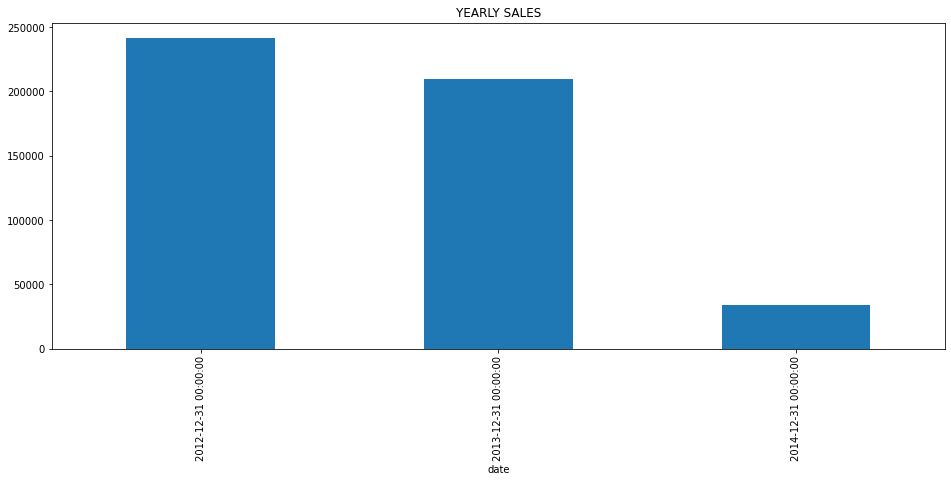

In [18]:
year_most_sales = train_data.resample(rule='A').sum()['sales'] 
year_most_sales.plot.bar(figsize=(16,6))
plt.title("YEARLY SALES")

# Top sold products

In [4]:
df = pd.DataFrame(train_data.groupby("product_identifier").sum()['sales'].sort_values(ascending=False)).head()

Text(0.5, 1.0, 'TOP 5 SOLD PRODUCTS')

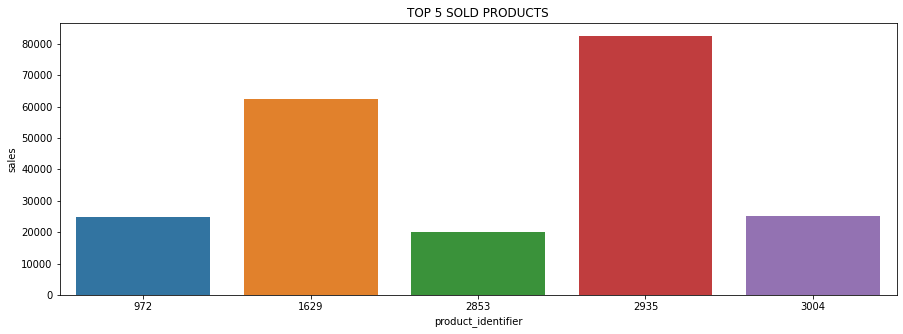

In [19]:
# Top 5 products sold
plt.figure(figsize=(15,5))
sns.barplot(x=df.index,y="sales",data=df)
plt.title("TOP 5 SOLD PRODUCTS")

# Top 5 departments

In [10]:
df1 = pd.DataFrame(train_data.groupby("department_identifier").sum()['sales'].sort_values(ascending=False)).head()

<AxesSubplot:xlabel='department_identifier', ylabel='sales'>

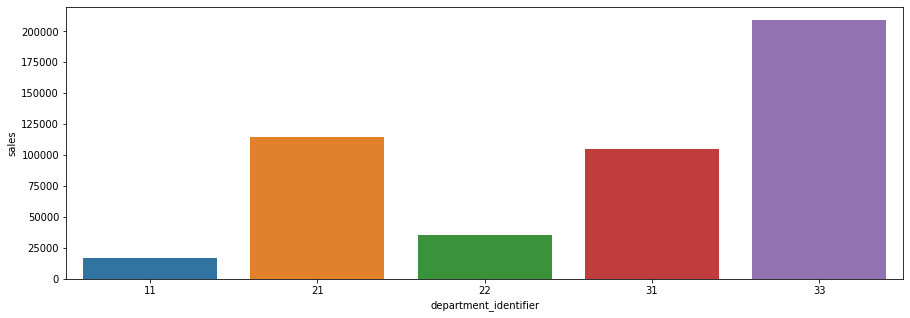

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1.index,y="sales",data=df1)     # Top 5 sales wrt departments

# Sale wrt each category of products

In [22]:
df2 = pd.DataFrame(train_data.groupby("category_of_product").sum()['sales'].sort_values(ascending=False))

<AxesSubplot:xlabel='category_of_product', ylabel='sales'>

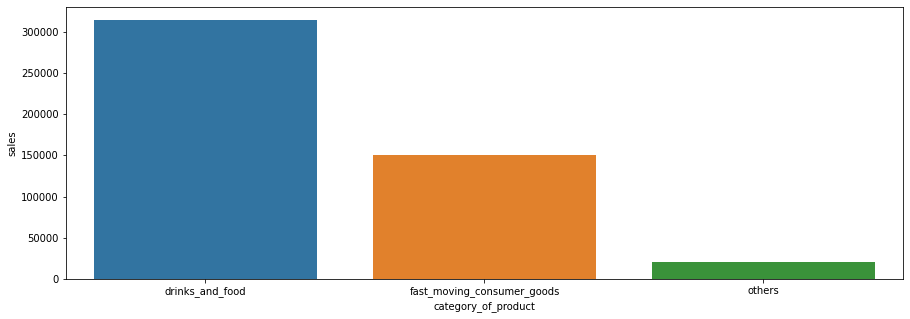

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=df2.index,y="sales",data=df2)  

# Sales across each state

In [30]:
df3 = pd.DataFrame(train_data.groupby("state").sum()['sales'].sort_values(ascending=False))

<AxesSubplot:xlabel='state', ylabel='sales'>

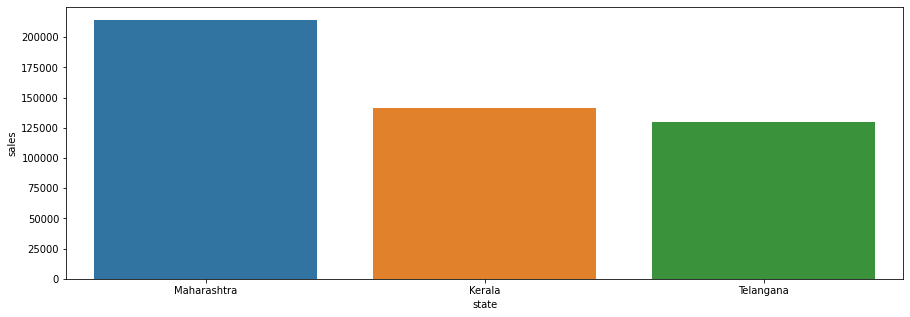

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=df3.index,y="sales",data=df3)

# Yearly  sales for each state

<AxesSubplot:xlabel='year,state'>

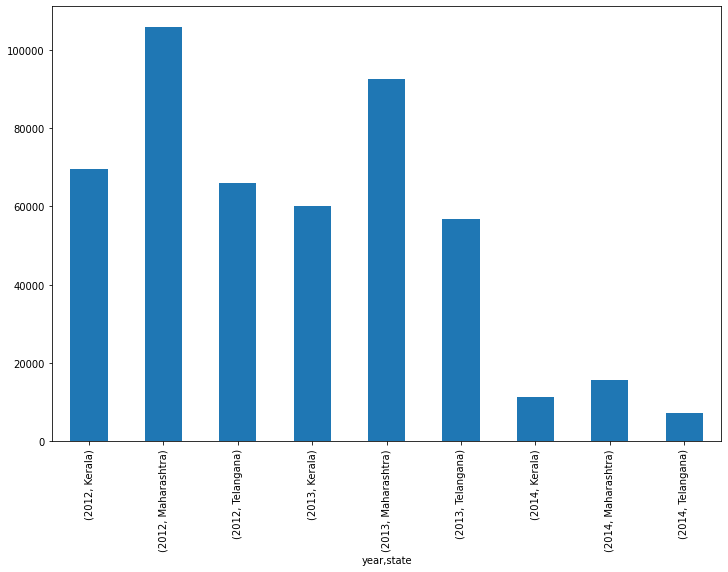

In [31]:
plt.figure(figsize=(12,8))
train_data.groupby(["year","state"]).sum()["sales"].plot(kind="bar")

# Sales vs selling price

In [43]:
df5 = train_data.groupby(["product_identifier"]).mean()[["sales","sell_price"]]

<AxesSubplot:xlabel='sell_price', ylabel='sales'>

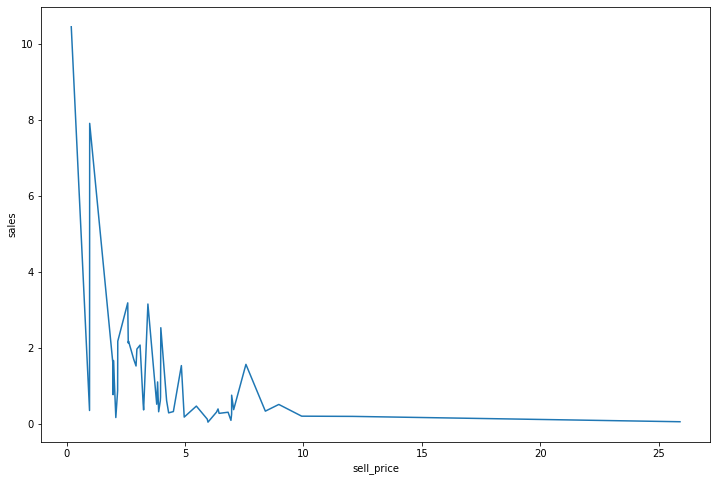

In [48]:
plt.figure(figsize=(12,8))
sns.lineplot(x="sell_price",y="sales",data=df5)

#### Products with sell_price between 0 to 3 had the maximum sales